In [1]:
import pandas as pd
# import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# from pathlib import Path
# import json
# sns.set_context("notebook")

Initial check using 100 samples on `squad` and `pythia-1b`.

In [2]:
df = pd.read_json("data/quick_sweep/squad_1b-2023-09-06T14:10:21.jsonl", lines=True)

In [3]:
df

,dataset,shots,model_scale,sparsity,k,local_ratio,acc,_duration
0,squad,1,1b,eviction,32,0.25,0.02,651.086834
1,squad,1,1b,eviction_cluster,32,0.25,0.01,1040.984241
2,squad,1,1b,eviction,64,0.25,0.03,698.185068
3,squad,1,1b,eviction_cluster,64,0.25,0.03,1147.081773
4,squad,1,1b,eviction,128,0.25,0.10,705.581615
5,squad,1,1b,eviction_cluster,128,0.25,0.04,1132.817342
6,squad,1,1b,eviction,256,0.25,0.11,722.455276
7,squad,1,1b,eviction_cluster,256,0.25,0.07,1124.071638
8,squad,1,1b,eviction,512,0.25,0.18,691.431915
9,squad,1,1b,eviction_cluster,512,0.25,0.09,1101.274139


**Note**: Averaging the evicted keys significantly degrades the performance!

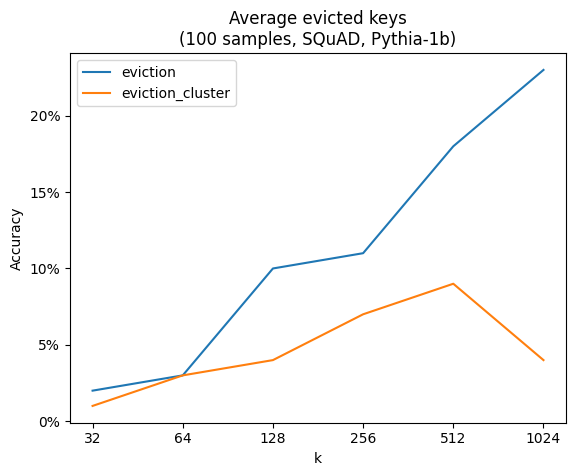

In [4]:
for sparsity, f in df.groupby("sparsity"):
    plt.plot(f["k"], f["acc"], label=sparsity)
plt.title("Average evicted keys\n(100 samples, SQuAD, Pythia-1b)")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xscale("log", base=2)
ax = plt.gca()
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0%}"))